In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

import seaborn as sns
from scipy import stats
import skillsnetwork 

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
local_path = "./laptops_price.csv"

request = requests.get(url)

if(request.status_code == 200):
    with open(local_path, 'wb') as file:
        file.write(request.content)
    print("Succes download file")
else: 
    print(f"Error, status code {request.status_code}")

path = "laptops_price.csv"

Succes download file


In [7]:
df = pd.read_csv(path)
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [9]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)
df.head(2)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.2,634


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


In [10]:
missing_data = df.isnull()
print(missing_data.head(2), '\n\n')

for column in missing_data.columns.values:
    print(missing_data[column].value_counts(), '\n')

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False   


Unnamed: 0
False    238
Name: count, dtype: int64 

Manufacturer
False    238
Name: count, dtype: int64 

Category
False    238
Name: count, dtype: int64 

Screen
False    238
Name: count, dtype: int64 

GPU
False    238
Name: count, dtype: int64 

OS
False    238
Name: count, dtype: int64 

CPU_core
False    238
Name: count, dtype: int64 

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64 

CPU_frequency
False    238
Name: count, dtype: int64 

RAM_GB
False    238
Name: count, dtype: int64 

Storage_GB_SSD
False    238
Nam

# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [11]:
weight_mean = df[['Weight_kg']].astype('float').mean(axis=0)
print(weight_mean)
df[['Weight_kg']].replace(np.nan, weight_mean, inplace=True)

Weight_kg    1.862232
dtype: float64


C:\Users\matia\AppData\Local\Temp\ipykernel_19700\445131727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Weight_kg']].replace(np.nan, weight_mean, inplace=True)


# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [12]:
df[['Weight_kg', 'Screen_Size_cm']] = df[['Weight_kg', 'Screen_Size_cm']].astype('float')

# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [13]:
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg': 'Weight_pounds'}, inplace=True)

df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm': 'Screen_Size_inch'}, inplace=True)

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [14]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [15]:
group_names = ['Low', 'Midium', 'Heigh']
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4).astype('int')

df['Price_bined'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)
df['Price_bined'].value_counts()

Price_bined
Low       160
Midium     72
Heigh       6
Name: count, dtype: int64

Plot the graph

Text(0.5, 1.0, 'Price bins')

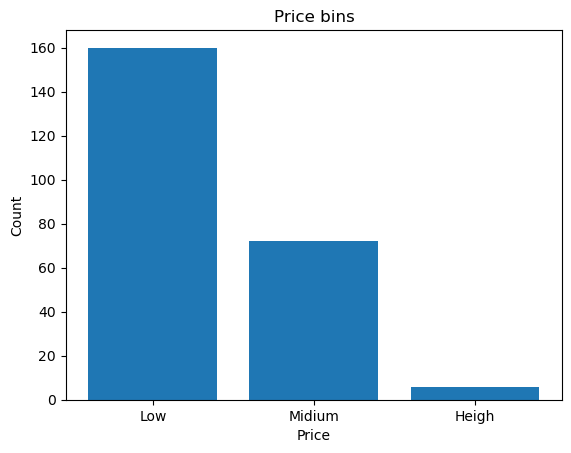

In [16]:
plt.bar(group_names, df['Price_bined'].value_counts())
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price bins')

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [17]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [18]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_bined,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
